In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [4]:
class RegionalAnalysis(object):
    def __init__(self, time_series_path, 
                 daily_reports_path, stat_area_path,
                 results_path):
        self.time_series_path_ = time_series_path
        self.daily_reports_path_ = daily_reports_path
        self.stat_area_path_ = stat_area_path
        self.results_path_ = results_path
        self.stat_area_map_ = pd.DataFrame()
        self.daily_reports_ = pd.DataFrame()
        self.time_series_deaths_ = pd.DataFrame()
        self.time_series_cases_ = pd.DataFrame()
        self.time_series_files_ = {
            'deaths': 'csse_covid_19_time_series/time_series_covid19_deaths_US.csv',
            'cases': 'csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
        }

    def _pull_stat_area_map(self):
        self.stat_area_map_ = pd.read_csv(self.stat_area_path_+'statistical_areas.csv')

    def _join_stat_areas(self, df):
        if self.stat_area_map_.empty:
            self._pull_stat_area_map()

        df = df.join(
            self.stat_area_map_.set_index(['Province_State', 'Admin2']),
            how='left', on=['Province_State', 'Admin2']
        )

        return df

    def _pull_time_series(self):
        for k in self.time_series_files_.keys():

            df = pd.read_csv(self.time_series_path_+self.time_series_files_[k])
            df = self._join_stat_areas(df)
            df = df[
                (df.Province_State == 'Missouri')|
                (df.MSA.notnull())
            ]
            df.loc[df.Admin2.isin(['Out of MO', 'Unassigned']), 'MSA'] = 'Unassigned/Out of MO'
            df.loc[
                (df.Province_State == 'Missouri')&
                (df.MSA.isnull()),
                'MSA'
            ] = 'Missouri non-MSA'
            attr = [x for x in dir(self) if k in x][0]
            self.__dict__[attr] = df

    def _pull_daily_report_data(self):

        pass

## Branson Trip

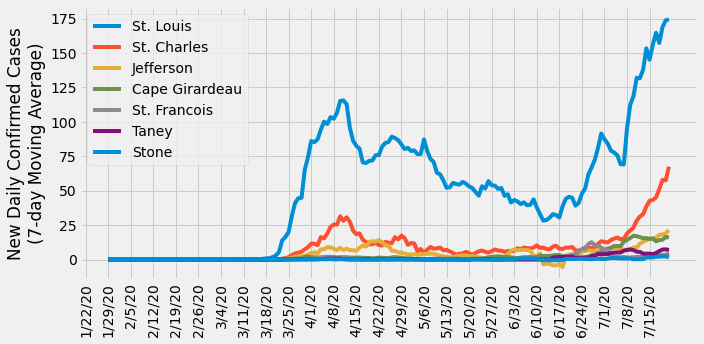

In [24]:
ra = RegionalAnalysis(
    time_series_path='../../csse_covid_19_data/',
    daily_reports_path=None,
    stat_area_path='../data/',
    results_path=''
)

ra._pull_time_series()
df=ra.time_series_cases_

# Figure Info
plt.figure(figsize=(10, 5))

# X-axis
cols = df.columns[df.columns.str.contains('/20')]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)
steps = np.arange(0, xticks.shape[0], 7)

counties = [
    {'a':'St. Louis', 'c': 'C0'}, 
    {'a': 'St. Charles', 'c': 'C1'},
    {'a': 'Jefferson','c': 'C2'},
    {'a': 'Cape Girardeau', 'c': 'C3'},
    {'a': 'St. Francois', 'c': 'C4'},
    {'a': 'Taney', 'c': 'C5'},
    {'a': 'Stone', 'c': 'C6'}
]
# Top Counties
for county in counties:
    cond = "(Admin2 == '%s')"%county['a']
    y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
    plt.plot(xticks, y, label='%s'%county['a'], color=county['c'])

# Titles, Legends, & Labels
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('New Daily Confirmed Cases\n(7-day Moving Average)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [22]:
ra.time_series_cases_.Admin2.unique()

array(['Alexander', 'Bond', 'Calhoun', 'Clinton', 'Jersey', 'Macoupin',
       'Madison', 'Monroe', 'St. Clair', 'Doniphan', 'Johnson',
       'Leavenworth', 'Linn', 'Miami', 'Wyandotte', 'Adair', 'Andrew',
       'Atchison', 'Audrain', 'Barry', 'Barton', 'Bates', 'Benton',
       'Bollinger', 'Boone', 'Buchanan', 'Butler', 'Caldwell', 'Callaway',
       'Camden', 'Cape Girardeau', 'Carroll', 'Carter', 'Cass', 'Cedar',
       'Chariton', 'Christian', 'Clark', 'Clay', 'Cole', 'Cooper',
       'Crawford', 'Dade', 'Dallas', 'Daviess', 'DeKalb', 'Dent',
       'Douglas', 'Dunklin', 'Franklin', 'Gasconade', 'Gentry', 'Greene',
       'Grundy', 'Harrison', 'Henry', 'Hickory', 'Holt', 'Howard',
       'Howell', 'Iron', 'Jackson', 'Jasper', 'Jefferson', 'Knox',
       'Laclede', 'Lafayette', 'Lawrence', 'Lewis', 'Lincoln',
       'Livingston', 'McDonald', 'Macon', 'Maries', 'Marion', 'Mercer',
       'Miller', 'Mississippi', 'Moniteau', 'Montgomery', 'Morgan',
       'New Madrid', 'Newton', 'N

## Tracking Data Issues

In [2]:
path = '../csse_covid_19_data/csse_covid_19_time_series/'
df = pd.read_csv(path+'time_series_covid19_confirmed_US.csv')
date_cols = [x for x in df.columns if '/20' in x]

In [3]:
df['max_cases'] = df[date_cols].max(axis=1).values
df[df['6/14/20'] < df[date_cols].max(axis=1)][['Admin2', 'Province_State', 'max_cases', '6/14/20']]

,Admin2,Province_State,max_cases,6/14/20
40,Jackson,Alabama,123,122
93,Prince of Wales-Hyder,Alaska,4,2
106,Greenlee,Arizona,12,11
127,Cleburne,Arkansas,76,75
149,Jackson,Arkansas,16,15
...,...,...,...,...
3246,Unassigned,Washington,915,48
3247,Unassigned,West Virginia,37,0
3248,Unassigned,Wisconsin,61,0
3251,Dukes and Nantucket,Massachusetts,56,55


## Previous Analysis

In [4]:
path = '../csse_covid_19_data/csse_covid_19_time_series/'
df = pd.read_csv(path+'time_series_covid19_deaths_US.csv')

In [5]:
counties = {
    'Bond': 'Illinois',
    'Calhoun': 'Illinois',
    'Clinton': 'Illinois',
    'Jersey': 'Illinois',
    'Macoupin': 'Illinois',
    'Madison': 'Illinois',
    'Monroe': 'Illinois',
    'St. Clair': 'Illinois',
    'Franklin': 'Missouri',
    'Jefferson': 'Missouri',
    'Lincoln': 'Missouri',
    'St. Charles': 'Missouri',
    'St. Louis City': 'Missouri',
    'St. Louis': 'Missouri',
    'Warren': 'Missouri'
}

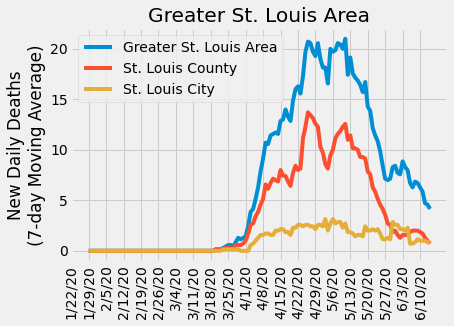

In [6]:
cond = ""
for k in counties.keys():
    cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
            %(counties[k], k)
cond = cond[:-1]
cols = df.columns[df.columns.str.contains('/20')]
df.query(cond).loc[:, cols]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)

y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='Greater St. Louis Area')

cond = "(Province_State == 'Missouri')&(Admin2 == 'St. Louis')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis County')

cond = "(Province_State == 'Missouri')&(Admin2 == 'St. Louis City')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis City')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('New Daily Deaths\n(7-day Moving Average)')
plt.title('Greater St. Louis Area')
plt.legend(loc='upper left')
plt.show()

## Missouri Statistical Areas

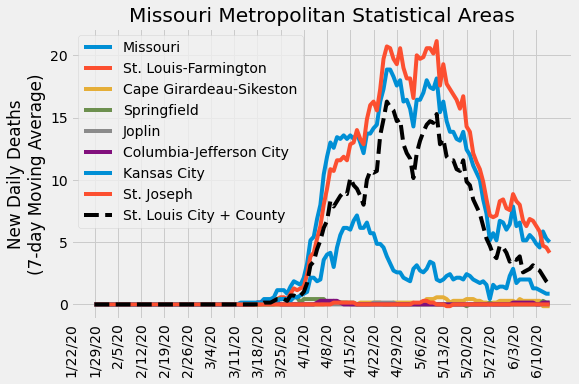

In [7]:
msa = pd.read_csv('statistical_areas.csv')
cols = df.columns[df.columns.str.contains('/20')]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)
plt.figure(figsize=(8, 5))

# Missouri
cond = "(Province_State == 'Missouri')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='Missouri')

# MSAs
for area in msa.MSA.unique():
    cond = ""
    for row in msa[msa.MSA == area].values:
        cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
                %(row[1], row[2])
    cond = cond[:-1]

    y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
    plt.plot(xticks, y, label=area)

# St. Louis City + County
cond = "((Province_State == 'Missouri')&(Admin2 == 'St. Louis'))|"
cond += "((Province_State == 'Missouri')&(Admin2 == 'St. Louis City'))"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis City + County',
         linestyle='--', color='k')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('New Daily Deaths\n(7-day Moving Average)')
plt.title('Missouri Metropolitan Statistical Areas')
plt.legend(loc='upper left')
plt.show()

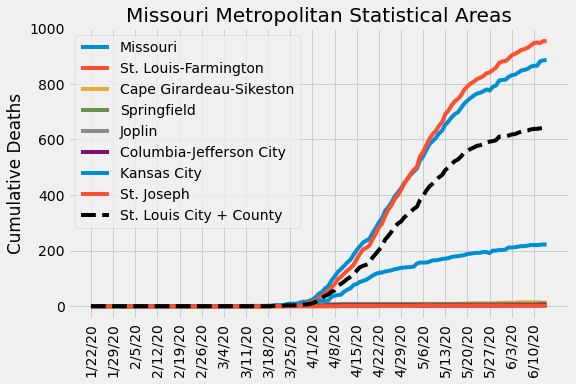

In [8]:
msa = pd.read_csv('statistical_areas.csv')
cols = df.columns[df.columns.str.contains('/20')]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)
plt.figure(figsize=(8, 5))

# Missouri
cond = "(Province_State == 'Missouri')"
y = df.query(cond).loc[:, cols].sum(axis=0)
plt.plot(xticks, y, label='Missouri')

# MSAs
for area in msa.MSA.unique():
    cond = ""
    for row in msa[msa.MSA == area].values:
        cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
                %(row[1], row[2])
    cond = cond[:-1]

    y = df.query(cond).loc[:, cols].sum(axis=0)
    plt.plot(xticks, y, label=area)

# St. Louis City + County
cond = "((Province_State == 'Missouri')&(Admin2 == 'St. Louis'))|"
cond += "((Province_State == 'Missouri')&(Admin2 == 'St. Louis City'))"
y = df.query(cond).loc[:, cols].sum(axis=0)
plt.plot(xticks, y, label='St. Louis City + County',
         linestyle='--', color='k')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('Cumulative Deaths')
plt.title('Missouri Metropolitan Statistical Areas')
plt.legend(loc='upper left')
plt.show()

## Confirmed Cases

In [9]:
path = '../csse_covid_19_data/csse_covid_19_time_series/'
df = pd.read_csv(path+'time_series_covid19_confirmed_US.csv')

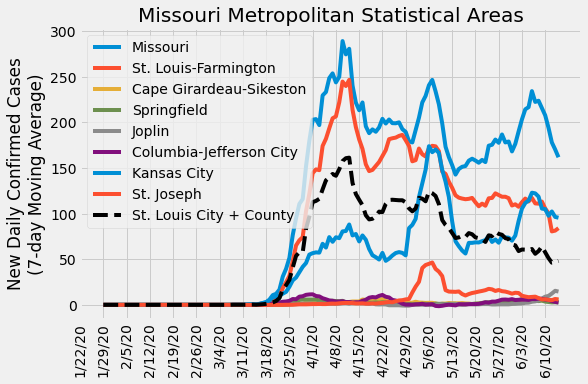

In [10]:
msa = pd.read_csv('statistical_areas.csv')
cols = df.columns[df.columns.str.contains('/20')]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)
plt.figure(figsize=(8, 5))

# Missouri
cond = "(Province_State == 'Missouri')"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='Missouri')

# MSAs
for area in msa.MSA.unique():
    cond = ""
    for row in msa[msa.MSA == area].values:
        cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
                %(row[1], row[2])
    cond = cond[:-1]

    y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
    plt.plot(xticks, y, label=area)

# St. Louis City + County
cond = "((Province_State == 'Missouri')&(Admin2 == 'St. Louis'))|"
cond += "((Province_State == 'Missouri')&(Admin2 == 'St. Louis City'))"
y = df.query(cond).loc[:, cols].sum(axis=0).diff().rolling(window=7).mean()
plt.plot(xticks, y, label='St. Louis City + County',
         linestyle='--', color='k')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('New Daily Confirmed Cases\n(7-day Moving Average)')
plt.title('Missouri Metropolitan Statistical Areas')
plt.legend(loc='upper left')
plt.show()

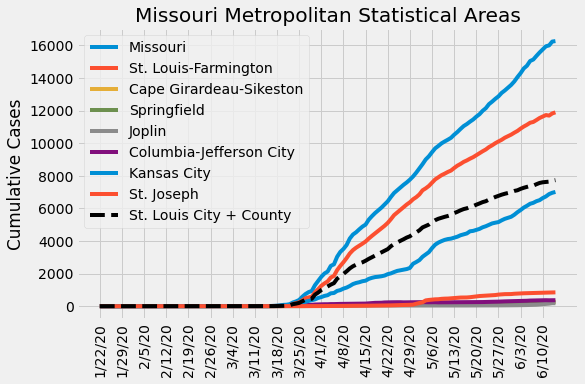

In [11]:
msa = pd.read_csv('statistical_areas.csv')
cols = df.columns[df.columns.str.contains('/20')]
xlabels = df.loc[:, cols].columns
xticks = np.arange(0, xlabels.shape[0], 1)
plt.figure(figsize=(8, 5))

# Missouri
cond = "(Province_State == 'Missouri')"
y = df.query(cond).loc[:, cols].sum(axis=0)
plt.plot(xticks, y, label='Missouri')

# MSAs
for area in msa.MSA.unique():
    cond = ""
    for row in msa[msa.MSA == area].values:
        cond += "((Province_State == '%s')&(Admin2 == '%s'))|"\
                %(row[1], row[2])
    cond = cond[:-1]

    y = df.query(cond).loc[:, cols].sum(axis=0)
    plt.plot(xticks, y, label=area)

# St. Louis City + County
cond = "((Province_State == 'Missouri')&(Admin2 == 'St. Louis'))|"
cond += "((Province_State == 'Missouri')&(Admin2 == 'St. Louis City'))"
y = df.query(cond).loc[:, cols].sum(axis=0)
plt.plot(xticks, y, label='St. Louis City + County',
         linestyle='--', color='k')

steps = np.arange(0, xticks.shape[0], 7)
plt.xticks(xticks[steps], xlabels[steps], rotation=90)
plt.ylabel('Cumulative Cases')
plt.title('Missouri Metropolitan Statistical Areas')
plt.legend(loc='upper left')
plt.show()